- 이미지의 크기를 조정한다.
- 색을 그레이스케일로 변환한다.
- 이미지의 각 픽셀의 평균을 계산한다.
- 각 픽셀의 어두운 정도가 평균보다 크면 1, 작으면 0으로 변환한다.

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 이미지 데이터를 숫자형태로 분석하는 함수
def get_binary(fname, size=16):
    # 이미지를 불러온다.
    img = Image.open(fname)
    plt.imshow(img)
    plt.show()
    
    # 이미지를 그레이스케일로 바꾼다.
    # L : 그레이스케일, 1: 이진화, ,RGB, RGBA, CMYK
    img2 = img.convert('L')
    plt.imshow(img2)
    plt.show()
    
    # 이미지의 사이즈를 줄인다.
    img3 = img2.resize((size,size), Image.ANTIALIAS)
    plt.imshow(img3)
    plt.show()
    
    # 이미지의 픽셀 데이터를 가져온다.
    pixel_data = img3.getdata()
    pixles = np.array(pixel_data)
    
    # 2차원 행렬로 변환
    pixles = pixles.reshape((size,size))
    
    # 색상값의 평균을 구한다.
    avg = pixles.mean()
    
    # 평균보다 크면 1, 작으면 0으로 변환
    diff = 1 * (pixles > avg)
    return diff

In [34]:
# 이진 해시 생성
def get_hash(data):
    bhash = []
    
    for n1 in data.tolist():
        # 행렬 안에 들어있는 모든 숫자를 하나씩 추출하여
        # 문자열로 변환하여 합친다.
        s1 = [str(i) for i in n1]
        s2 = ''.join(s1)
        
        # 이진수를 정수로 변환한다,
        i = int(s2,2)
        bhash.append('%04x' %i)
    return ''.join(bhash)

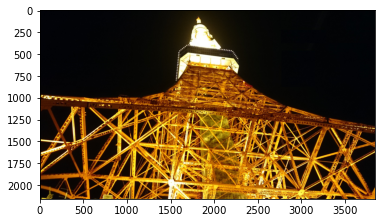

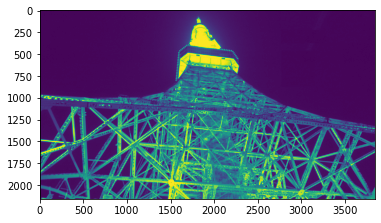

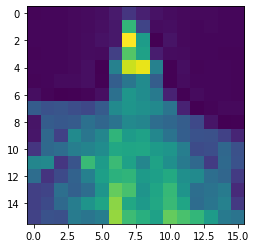

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0]
 [1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0]
 [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]]
000001000180018003c003c003c087e07ff05ff07ff2cffa9ffe3ffe3ffe1fff


In [35]:
a1 = get_binary('../images/tower.jpg')
print(a1)

# hash값을 생성한다.
a2 = get_hash(a1)
print(a2)